In [ ]:
# !pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd

import re

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import numpy as np

# Data

In [4]:
#data = pd.read_csv("data/ACL_data.csv")
data = pd.read_csv("ACL_data.csv")
data.head()

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY
0,2022,A Systematic Survey of Text Worlds as Embodied...,Text Worlds are virtual environments for embod...,"Jansen, Peter",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
1,2022,A Minimal Computational Improviser Based on Or...,A prototype system for playing a minimal impro...,"Montfort, Nick and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
2,2022,Craft an Iron Sword: Dynamically Generating In...,Non-Player Characters (NPCs) significantly enh...,"Volum, Ryan and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
3,2022,A Sequence Modelling Approach to Question Answ...,Interactive Question Answering (IQA) requires ...,"Furman, Gregory and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
4,2022,Automatic Exploration of Textual Environments ...,The purpose of this extended abstract is to di...,"Teodorescu, Laetitia and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS


In [5]:
data.tail()

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY
33806,1963,A computer representation for semantic informa...,This paper deals with the problem of represent...,"Raphael, Bertram",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS
33807,1963,Specifications for generative grammars used in...,It becomes more and more evident that successf...,"Tabory, Robert",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS
33808,1963,Collecting linguistic data for the grammar of ...,Establishing the grammatical description of a ...,"Tosh, Wayne",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS
33809,1963,Derivational suffixes in {R}ussian general voc...,A grammar based upon a conventional morphemic ...,"Wahlgren, John H.",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS
33810,1963,On the order of clauses,We used to think that the output of a translat...,"Yngve, Victor H.",NaN,Proceedings of the Annual meeting of the Assoc...,INPROCEEDINGS


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33811 entries, 0 to 33810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YEAR       33811 non-null  int64 
 1   TITLE      33811 non-null  object
 2   ABSTRACT   33703 non-null  object
 3   AUTHOR     33768 non-null  object
 4   PUBLISHER  32951 non-null  object
 5   BOOKTITLE  33156 non-null  object
 6   CATEGORY   33811 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [7]:
# FILTRO TODOS LOS REGISTROS CON NULOS, DADO Q SOLO SE PIERDE EL 2.5% DE LOS DATOS.
# Y QUIZAS SEA NECESARIO TENER TODOS LOS CAMPOS DE INFO PARA ANALIZAR TOPICOS O GENEROS (SEXO) SEGUN AUTOR, PUBLISHER, ETC
data_original = data #GUARDO LA DATA ORIGINAL ANTES DE QUITARLE LOS N/A, POR LAS DUDAS, PARA COMPARAR RESULTADOS
data = data.dropna()
data.info()
#32245/33811 = se perdieron el 4,63% de los datos.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32245 entries, 0 to 33724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YEAR       32245 non-null  int64 
 1   TITLE      32245 non-null  object
 2   ABSTRACT   32245 non-null  object
 3   AUTHOR     32245 non-null  object
 4   PUBLISHER  32245 non-null  object
 5   BOOKTITLE  32245 non-null  object
 6   CATEGORY   32245 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


In [ ]:
data.BOOKTITLE.value_counts()

Proceedings of the 12th Language Resources and Evaluation Conference                                                      895
Proceedings of the 2021 Conference on Empirical Methods in Natural Language Processing                                    847
Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics                                   778
Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing (EMNLP)                            751
Proceedings of the Tenth International Conference on Language Resources and Evaluation ({LREC}'16)                        745
                                                                                                                         ... 
Actes de la 9{\`e}me conf{\'e}rence sur le Traitement Automatique des Langues Naturelles. Conf{\'e}rences invit{\'e}es      1
Linguistic Issues in Language Technology, Volume 16, 2018                                                             

In [ ]:
data.PUBLISHER.value_counts()
#20975/21004 = se perdieron el 0,14% de los datos del Publisher "Association for Computational Linguistics" 

Association for Computational Linguistics                                                 20975
European Language Resources Association (ELRA)                                             4147
ATALA                                                                                      1337
European Language Resources Association                                                    1104
The COLING 2016 Organizing Committee                                                        738
International Committee on Computational Linguistics                                        654
INCOMA Ltd.                                                                                 569
Association for Machine Translation in the Americas                                         384
International Committee for Computational Linguistics                                       307
Asian Federation of Natural Language Processing                                             253
Chinese Information Processing Society o

In [ ]:
data.CATEGORY.value_counts()

INPROCEEDINGS    32245
Name: CATEGORY, dtype: int64

In [8]:
#print(data.ABSTRACT[:3])
data.ABSTRACT[:3].values

array(['Text Worlds are virtual environments for embodied agents that, unlike 2D or 3D environments, are rendered exclusively using textual descriptions. These environments offer an alternative to higher-fidelity 3D environments due to their low barrier to entry, providing the ability to study semantics, compositional inference, and other high-level tasks with rich action spaces while controlling for perceptual input. This systematic survey outlines recent developments in tooling, environments, and agent modeling for Text Worlds, while examining recent trends in knowledge graphs, common sense reasoning, transfer learning of Text World performance to higher-fidelity environments, as well as near-term development targets that, once achieved, make Text Worlds an attractive general research paradigm for natural language processing.',
       "A prototype system for playing a minimal improvisational game with one or more human or computer players is discussed. The game, Chain Reaction, has p

In [9]:
#\W: Matchea caracteres que NO sean alfanuméricos; equivalente a[^a-zA-Z0-9_].
#Los caracteres especiales + y * machean el patron mas largo posible ( se dice que + y * son "greedy")
re.sub('[^A-Za-z0-9]+', ' ', data.ABSTRACT[2])


'Non Player Characters NPCs significantly enhance the player experience in many games Historically players interactions with NPCs have tended to be highly scripted to be limited to natural language responses to be selected by the player and to not involve dynamic change in game state In this work we demonstrate that use of a few example conversational prompts can power a conversational agent to generate both natural language and novel code This approach can permit development of NPCs with which players can have grounded conversations that are free form and less repetitive We demonstrate our approach using OpenAI Codex GPT 3 finetuned on GitHub with Minecraft game development as our test bed We show that with a few example prompts a Codex based agent can generate novel code hold multi turn conversations and answer questions about structured data We evaluate this application using experienced gamers in a Minecraft realm and provide analysis of failure cases and suggest possible direction

## Limpieza, Normalizacion y Tokenización.

In [10]:
## DEFINIMOS FUNCIONES DE LIMPIEZA Y DE TOKENIZACION:
# The isinstance() function returns True if the specified object is of the specified type, otherwise False.
# \W: Matchea caracteres que NO sean alfanuméricos; equivalente a[^a-zA-Z0-9_].
# \d: Matchea digitos; equivalente a [0-9]
# "+": Matchea 1 o mas ocurrencias

def clean_text(text):
    #Para poder aplicarlo a todo el corpus (lista) #(data.ABSTRACT[0:10]):
    if isinstance(text, pd.Series):     
        # return text.str.replace('[^A-Za-z0-9]+', ' ', regex = True).str.lower().str.strip().values
        return text.str.replace('\W+', ' ', regex = True).str.lower().str.strip().str.replace('\d+', '').values
    
    #Para poder aplicarlo a 1 texto en particular (str) #(data.ABSTRACT[0]):
    elif isinstance(text, str):         
        return re.sub('\d+', '',  re.sub('[^A-Za-z0-9]+', ' ' , text.lower()).strip())

def tokenizer(text):
    #return [w for w in word_tokenize(text) if w.isalpha()] # si solo nos interesan palabras
    return word_tokenize(str(text))  ###***OJO: ESTA TOKENIZANDO TODO UN GRAN TEXTO PLANO (LA LISTA DE TEXTOS LA TRANSFORMO EN 1 SOLO TEXTO GIGANTE) 
    
    # if isinstance(text, str):
    #     return word_tokenize(text)
    # else:
    #     return text.apply(word_tokenize)



In [ ]:
(str(data.ABSTRACT))

'0        Text Worlds are virtual environments for embod...\n1        A prototype system for playing a minimal impro...\n2        Non-Player Characters (NPCs) significantly enh...\n3        Interactive Question Answering (IQA) requires ...\n4        The purpose of this extended abstract is to di...\n                               ...                        \n33717    There are a number of collocational constraint...\n33718    The search for efficient parsing strategies ha...\n33719    PREMO is a knowledge-based Preference Semantic...\n33720    2-Dimensional Context-Free Grammar (2D-CFG) fo...\n33724    A parser is described here based on the Cocke-...\nName: ABSTRACT, Length: 32245, dtype: object'

In [ ]:
clean_text(data.ABSTRACT[0])
#type(data.ABSTRACT[0:10])  #pandas.core.series.Series

pandas.core.series.Series

In [11]:
#### APLICAMOS LA FUNCION DE LIMPIEZA A TODO EL CORPUS, SOLO A LOS ABSTRACTS:
# EL PROBLEMA ES: *COMO GUARDAR EL TRACKEO DE A QUE AUTOR, PUBLISHER, YEAR, ETC, ESTABA ASOCIADO CADA ABSTRACT***
# ***EN EL CLEAN NO SE PIERDE, PERO SI SE VA A PERDER EN EL TOKENIZADO (PORQ SE DESARMA EN UNA LISTA DE PALABRAS).***
# *ENTONCES CREO UN CAMPO NUEVO CON EL ABSTRACT LIMPIADO:
data = data.assign(ABSTRACT_CL = clean_text(data.ABSTRACT))
#clean_text(data.ABSTRACT)
#type(clean_text(data.ABSTRACT))  #numpy.ndarray
#print(clean_text(data.ABSTRACT))
data.ABSTRACT_CL

0        text worlds are virtual environments for embod...
1        a prototype system for playing a minimal impro...
2        non player characters npcs significantly enhan...
3        interactive question answering iqa requires an...
4        the purpose of this extended abstract is to di...
                               ...                        
33717    there are a number of collocational constraint...
33718    the search for efficient parsing strategies ha...
33719    premo is a knowledge based preference semantic...
33720     dimensional context free grammar d cfg for  d...
33724    a parser is described here based on the cocke ...
Name: ABSTRACT_CL, Length: 32245, dtype: object

In [12]:
#data.ABSTRACT_CL
data.head(5)

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY,ABSTRACT_CL
0,2022,A Systematic Survey of Text Worlds as Embodied...,Text Worlds are virtual environments for embod...,"Jansen, Peter",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS,text worlds are virtual environments for embod...
1,2022,A Minimal Computational Improviser Based on Or...,A prototype system for playing a minimal impro...,"Montfort, Nick and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS,a prototype system for playing a minimal impro...
2,2022,Craft an Iron Sword: Dynamically Generating In...,Non-Player Characters (NPCs) significantly enh...,"Volum, Ryan and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS,non player characters npcs significantly enhan...
3,2022,A Sequence Modelling Approach to Question Answ...,Interactive Question Answering (IQA) requires ...,"Furman, Gregory and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS,interactive question answering iqa requires an...
4,2022,Automatic Exploration of Textual Environments ...,The purpose of this extended abstract is to di...,"Teodorescu, Laetitia and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS,the purpose of this extended abstract is to di...


In [13]:
# word_tokenize(clean_text(data.ABSTRACT))
len(tokenizer(data.ABSTRACT_CL))  #106 (!!!!)
#type(tokenizer(clean_text(data.ABSTRACT)))  #list
#tokenizer(data.ABSTRACT_CL)[:5]  # ['0', 'text', 'worlds', 'are', 'virtual']
#tokenizer(clean_text(data.ABSTRACT))[:5]  # ['[', "'text", 'worlds', 'are', 'virtual']
#tokenizer(data.ABSTRACT_CL)[105]  # ['32245', ',', 'dtype', ':', 'object']
#tokenizer(clean_text(data.ABSTRACT))[105]  # ['to', 'parsing', 'time', "'", ']']

106

In [14]:
len(tokenizer(clean_text(data.ABSTRACT)))
#1299   #769 (!!!!!)
### XXX NO ENTIENDO PORQUE HACIENDOLO ASI DA 769 TOKENS, Y CON LA COLUMNA NVA "ABSTRACT.CL" DA SOLO 106 TOKENS XXX !!!****
# ADEMAS, CUANDO LE QUITAS LOS NULOS, DA SOLO #769 (ANTES DABA 1299)

769

In [ ]:
#print( type( clean_text( data.ABSTRACT[0]) ))
#print( type(clean_text( data.ABSTRACT[:1]) ) )
#print( type(clean_text( data.ABSTRACT) ) )

# tokenizer(clean_text(data.ABSTRACT[:1] ))#[:10]

<class 'str'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
### POR ALGUNA RAZON, AL PASARLO A OTRO CAMPO NUEVO "ABSTRACT.CL" NO HACE BIEN EL TOKENIZADO (DEJA SOLO 106 TOKENS, Y TOMA "array", "object", etc)
### ASI Q VUELVO A LA MANERA ORIGINAL DE HACERLO TODO JUNTO EN EL CAMPO "ABSTRACT"
### CREO UNA VARIABLE Q CONTENGA TODO TOKENIZADO:
data_abstracts_token = tokenizer(clean_text(data.ABSTRACT))
data_abstracts_token[:10]


['[',
 "'text",
 'worlds',
 'are',
 'virtual',
 'environments',
 'for',
 'embodied',
 'agents',
 'that']

In [16]:
print(len(data_abstracts_token)) #769: datos sin nulos
print(type(data_abstracts_token))
print(data_abstracts_token[:15])
print(data_abstracts_token[-15:])
print(tokenizer(clean_text(data_original.ABSTRACT))[-15:])
len((tokenizer(clean_text(data_original.ABSTRACT)))) #1182: datos totales

769
<class 'list'>
['[', "'text", 'worlds', 'are', 'virtual', 'environments', 'for', 'embodied', 'agents', 'that', 'unlike', 'd', 'or', 'd', 'environments']
['is', 'generated', 'during', 'compilation', 'stage', 'its', 'generation', 'does', 'not', 'add', 'to', 'parsing', 'time', "'", ']']
['to', 'be', 'broken', 'into', 'two', 'or', 'more', 'sentences', 'when', 'translating', 'into', 'language', 'a', "'", ']']


1182

In [ ]:
#### CAMBIE EL ORDEN: PRIMERO STOPWORDS Y AL FINAL LEMATIZACION:

## Stopwords

In [17]:
stoplist = stopwords.words("english")
stoplist[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
# tokenizo el stoplist con el mismo tokenizar que voy a usar en el corpus
stoplist_tokenized = []
for w in stoplist:
    stoplist_tokenized = stoplist_tokenized + tokenizer(w)
    
# Armo una lista sin repeticiones
stoplist_tokenized = list(set(stoplist_tokenized))

stoplist_tokenized[:10]

['they',
 'with',
 'doesn',
 'into',
 'didn',
 'where',
 "n't",
 'herself',
 'having',
 'does']

## Stemming: XXXX NO SE PARA Q SE HACE SI DEPS NO SE USA PARA LA MATRIZ DEL CountVector.

In [19]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")


[(w,stemmer.stem(w)) for w in tokenizer(clean_text(data.ABSTRACT)) if w.isalpha()][:10]

[('worlds', 'world'),
 ('are', 'are'),
 ('virtual', 'virtual'),
 ('environments', 'environ'),
 ('for', 'for'),
 ('embodied', 'embodi'),
 ('agents', 'agent'),
 ('that', 'that'),
 ('unlike', 'unlik'),
 ('d', 'd')]

In [20]:
[(w,stemmer.stem(w)) for w in data_abstracts_token if w.isalpha()][:10]

[('worlds', 'world'),
 ('are', 'are'),
 ('virtual', 'virtual'),
 ('environments', 'environ'),
 ('for', 'for'),
 ('embodied', 'embodi'),
 ('agents', 'agent'),
 ('that', 'that'),
 ('unlike', 'unlik'),
 ('d', 'd')]

In [21]:
[(w,stemmer.stem(w)) for w in tokenizer(clean_text(data_original.ABSTRACT)) if w.isalpha()][:10]

[('worlds', 'world'),
 ('are', 'are'),
 ('virtual', 'virtual'),
 ('environments', 'environ'),
 ('for', 'for'),
 ('embodied', 'embodi'),
 ('agents', 'agent'),
 ('that', 'that'),
 ('unlike', 'unlik'),
 ('d', 'd')]

In [ ]:
[(w,stemmer.stem(w)) for w in data_abstracts_token if w.isalpha()][-10:]

[('compilation', 'compil'),
 ('stage', 'stage'),
 ('its', 'it'),
 ('generation', 'generat'),
 ('does', 'doe'),
 ('not', 'not'),
 ('add', 'add'),
 ('to', 'to'),
 ('parsing', 'pars'),
 ('time', 'time')]

In [22]:
[(w,stemmer.stem(w)) for w in tokenizer(clean_text(data_original.ABSTRACT)) if w.isalpha()][-10:]

[('into', 'into'),
 ('two', 'two'),
 ('or', 'or'),
 ('more', 'more'),
 ('sentences', 'sentenc'),
 ('when', 'when'),
 ('translating', 'translat'),
 ('into', 'into'),
 ('language', 'languag'),
 ('a', 'a')]

In [ ]:
stemmer.stem(clean_text(data.ABSTRACT[1]))

'a prototype system for playing a minimal improvisational game with one or more human or computer players is discussed the game chain reaction has players collectively build a chain of word pairs or solid compounds with a basis in oral culture it emphasizes memory and rapid improvisation chains are only locally coherent so absurdity and humor increases during play while it is trivial to develop a computer player using textual corpora and literature culture concepts our approach is unique in that we have grounded our work in the principles of oral culture according to walter ong an early scholar of orature we show how a simple computer model can be designed to embody many aspects of oral poetics as theorized by ong suggesting design directions for other work in oral improvisation and poetics the opportunities for own our system s further development include creating culturally specific automated players and situating play in different temporal physical and social context'

In [ ]:
clean_text(data.ABSTRACT[1])

'a prototype system for playing a minimal improvisational game with one or more human or computer players is discussed the game chain reaction has players collectively build a chain of word pairs or solid compounds with a basis in oral culture it emphasizes memory and rapid improvisation chains are only locally coherent so absurdity and humor increases during play while it is trivial to develop a computer player using textual corpora and literature culture concepts our approach is unique in that we have grounded our work in the principles of oral culture according to walter ong an early scholar of orature we show how a simple computer model can be designed to embody many aspects of oral poetics as theorized by ong suggesting design directions for other work in oral improvisation and poetics the opportunities for own our system s further development include creating culturally specific automated players and situating play in different temporal physical and social contexts'

In [ ]:
[(w,stemmer.stem(w)) for w in clean_text(data.ABSTRACT.iloc[0]) if w.isalpha()][:10]

[('t', 't'),
 ('e', 'e'),
 ('x', 'x'),
 ('t', 't'),
 ('w', 'w'),
 ('o', 'o'),
 ('r', 'r'),
 ('l', 'l'),
 ('d', 'd'),
 ('s', 's')]

In [ ]:
clean_text(data.ABSTRACT[0])

'text worlds are virtual environments for embodied agents that, unlike 2d or 3d environments, are rendered exclusively using textual descriptions. these environments offer an alternative to higher-fidelity 3d environments due to their low barrier to entry, providing the ability to study semantics, compositional inference, and other high-level tasks with rich action spaces while controlling for perceptual input. this systematic survey outlines recent developments in tooling, environments, and agent modeling for text worlds, while examining recent trends in knowledge graphs, common sense reasoning, transfer learning of text world performance to higher-fidelity environments, as well as near-term development targets that, once achieved, make text worlds an attractive general research paradigm for natural language processing.'

In [23]:
#CREO UNA VARIABLE CON TODO EL TEXTO LIMPIADO, TOKENIZADO Y STEMMIZADO (XXX ESTO ULTIMO NO SE POR QUE NO SE CARGA AL CountVectorizer)
#data_abstracts_token[:15]
data_abstracts_token_stem = [stemmer.stem(w) for w in data_abstracts_token ] #if w.isalpha()]


In [24]:
data_abstracts_token_stem[:15]

['[',
 'text',
 'world',
 'are',
 'virtual',
 'environ',
 'for',
 'embodi',
 'agent',
 'that',
 'unlik',
 'd',
 'or',
 'd',
 'environ']

In [ ]:
data_abstracts_token_stem[-15:]

['is',
 'generat',
 'dure',
 'compil',
 'stage',
 'it',
 'generat',
 'doe',
 'not',
 'add',
 'to',
 'pars',
 'time',
 "'",
 ']']

In [ ]:
len(data_abstracts_token_stem) #769: ESTOS SON LOS TOKENS STEMIZADOS:
# XXX NO SE POR QUE DEPS NO SE USAN PARA EL CountVectorizer !!

769

## Extraigo features

In [25]:
#### CREO LA FUNCION DEL CountVectorizer, Q CUENTA APARICION DE PALABRAS POR DOCUMENTO, APLICA PREPROCESADO, TOKENIZADO, STOPS Y MIN DE APARICIONES
#### LUEGO APLICO fit_transform Q CREARA UNA MATRIZ "TERMINO-DOCUMENTO" O "BOLSA DE PALABRAS".
# The astype(‘U’) is telling numpy to convert the data to Unicode (essentially a string in python 3).

count_vect = CountVectorizer(preprocessor=clean_text,
                             tokenizer=tokenizer,
                             min_df=5,
                             stop_words=stoplist_tokenized)

data_clean = count_vect.fit_transform(data.ABSTRACT.values.astype('U')) # cuenta frecuencia de tokens y define el diccionario
# X_test = count_vect.transform(X_test_text) # cuenta frecuencia de tokens existentes en el diccionario
data_clean

<32245x14878 sparse matrix of type '<class 'numpy.int64'>'
	with 2109709 stored elements in Compressed Sparse Row format>

In [ ]:
#### VOY A PROBAR CREAR LO MISMO DE ANTES (MATRIZ TERMINO-DOCUMENTO) PERO USANDO LOS TOKENS STEMMIZADOS:
data_abstracts_token_stem
count_vect_STEM = CountVectorizer(
                             min_df=5,
                             stop_words=stoplist_tokenized)

data_clean_STEM = count_vect_STEM.fit_transform(data_abstracts_token_stem) # cuenta frecuencia de tokens y define el diccionario
data_clean_STEM
#### XXXXX NO SIRVE PORQ SE OBTIENE UNA MATRIZ DE 769 TOKENS, NO DE 32245 DOCUMENTOS XXXX
#<769x12 sparse matrix of type '<class 'numpy.int64'>'
#	with 77 stored elements in Compressed Sparse Row format>

<769x12 sparse matrix of type '<class 'numpy.int64'>'
	with 77 stored elements in Compressed Sparse Row format>

+ Consultar sobre diferencia entre fit_transform y transform

+ Falta limpiar  terminos ?

In [ ]:
#### XXXX NO ENTIENDO, PREGUNTAR PROFES:
#### XXXXX POR QUE CREA UNA MATRIZ DE 14878 COLUMNAS, SI HABIA SOLO 769 TOKENS????????????????? XXXXXX

In [ ]:
print("tamaño de la matriz:",32245*14878)  ### XXX NO ENTIENDO
print("porcentaje de elementos distintos de cero: %",round(100*2109709/(32352*19342),2))

tamaño de la matriz: 479741110
porcentaje de elementos distintos de cero: % 0.34


In [ ]:
count_vect.get_feature_names()[:15]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aac',
 'aachen',
 'aae',
 'ab',
 'abandoned',
 'abbreviated',
 'abbreviation',
 'abbreviations',
 'abc',
 'abduction',
 'abductive',
 'abdul',
 'abeill',
 'abilities']

In [ ]:
count_vect_STEM.get_feature_names()[:15]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['algorithm',
 'develop',
 'dimension',
 'environ',
 'game',
 'languag',
 'pars',
 'player',
 'prefer',
 'rule',
 'text',
 'use']

In [ ]:
count_vect

CountVectorizer(min_df=5, preprocessor=<function clean_text at 0x7f59c6080cb0>,
                stop_words=['ourselves', 'most', 'into', 'through', 'aren',
                            'who', "'ve", 'him', 'have', 'up', 'its', 'whom',
                            'where', 'such', 'at', 'from', 'once', 'no', 'not',
                            'which', 'her', 'ain', 'will', 'haven', 'wasn',
                            'or', 'against', 'other', 'below', 'did', ...],
                tokenizer=<function tokenizer at 0x7f59c6080dd0>)

In [ ]:
type(count_vect)

sklearn.feature_extraction.text.CountVectorizer

In [ ]:
type(data_clean)

scipy.sparse.csr.csr_matrix

In [ ]:
data_clean

<32245x14878 sparse matrix of type '<class 'numpy.int64'>'
	with 2109709 stored elements in Compressed Sparse Row format>

In [ ]:
#print(data_clean[:20])
np.shape(data_clean)

(32245, 14878)

In [ ]:
np.info(data_clean)

Compressed Sparse Row matrix

This can be instantiated in several ways:
    csr_matrix(D)
        with a dense matrix or rank-2 ndarray D

    csr_matrix(S)
        with another sparse matrix S (equivalent to S.tocsr())

    csr_matrix((M, N), [dtype])
        to construct an empty matrix with shape (M, N)
        dtype is optional, defaulting to dtype='d'.

    csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
        where ``data``, ``row_ind`` and ``col_ind`` satisfy the
        relationship ``a[row_ind[k], col_ind[k]] = data[k]``.

    csr_matrix((data, indices, indptr), [shape=(M, N)])
        is the standard CSR representation where the column indices for
        row i are stored in ``indices[indptr[i]:indptr[i+1]]`` and their
        corresponding values are stored in ``data[indptr[i]:indptr[i+1]]``.
        If the shape parameter is not supplied, the matrix dimensions
        are inferred from the index arrays.

Attributes
----------
dtype : dtype
    Data type of the matr

In [ ]:
print(data_clean)  ### HACER LDA!!!!!
### (ANTES PROBAR EL data_clean HACERLO STEMMIZADO!!!!!): NO FUNCIONA XXX 


  (0, 13364)	4
  (0, 14781)	3
  (0, 14467)	1
  (0, 4582)	6
  (0, 4340)	1
  (0, 341)	1
  (0, 14124)	1
  (0, 11210)	1
  (0, 4811)	1
  (0, 14244)	1
  (0, 13380)	1
  (0, 3536)	1
  (0, 9132)	1
  (0, 500)	1
  (0, 6121)	2
  (0, 5187)	2
  (0, 4120)	1
  (0, 7809)	1
  (0, 1227)	1
  (0, 4574)	1
  (0, 10549)	1
  (0, 15)	1
  (0, 12756)	1
  (0, 11929)	1
  (0, 2435)	1
  :	:
  (32244, 729)	1
  (32244, 4028)	1
  (32244, 737)	1
  (32244, 9534)	1
  (32244, 8210)	3
  (32244, 418)	1
  (32244, 13136)	2
  (32244, 9530)	1
  (32244, 11662)	4
  (32244, 2375)	1
  (32244, 13544)	1
  (32244, 8307)	1
  (32244, 8760)	1
  (32244, 4857)	1
  (32244, 7626)	1
  (32244, 11664)	2
  (32244, 6419)	1
  (32244, 2860)	1
  (32244, 6728)	1
  (32244, 4534)	1
  (32244, 14854)	1
  (32244, 7229)	1
  (32244, 10145)	1
  (32244, 1275)	1
  (32244, 2162)	1


In [ ]:
#### LDA TOTAL (SIN FILTRAR POR AÑO):  ***CON LIBRERIA scikit-learn***
#### 1) HAY QUE HACER LA TRANSFORMACION TF-IDF 
#(para transformar la Bolsa de Palabras en una Bolsa con Importancia por cada Palabra: aplica una formula con el logaritmo de la cantidad q aparecen en todos los documentos)
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

#### TRANSFORMACION TF-IDF: NO SE SI SE APLICA A LA MATRIZ TERMINO-DOC O AL TEXTO PREVIO EN CRUDO!!!!
from sklearn.feature_extraction.text import TfidfVectorizer

"""corpus = [     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]"""
# corpus = data_clean  ### FALLA: POR LO TANTO SE APLICA AL TEXTO CRUDO.

#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(corpus)
#vectorizer.get_feature_names_out()

#print(X.shape)

vectorizer = TfidfVectorizer(preprocessor=clean_text,
                             tokenizer=tokenizer,
                             min_df=5,
                             stop_words=stoplist_tokenized)

data_TF_IDF = vectorizer.fit_transform(data.ABSTRACT.values.astype('U')) # cuenta frecuencia de tokens x doc/importancia (frec en todo corpus) y define el diccionario
vectorizer.get_feature_names_out()

print(data_TF_IDF.shape)
"""usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['n'] not in stop_words.
  % sorted(inconsistent)
(32245, 14878)"""
# FUNCIONO!: GENERO UNA MATRIZ DE 32245 X 14878 (IGUAL TAMAÑO Q LA TERMINO-DOC!)
#data_clean



/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['n'] not in stop_words.
  % sorted(inconsistent)


(32245, 14878)


In [ ]:
data_TF_IDF
"""<32245x14878 sparse matrix of type '<class 'numpy.float64'>'
	with 2109709 stored elements in Compressed Sparse Row format>"""

<32245x14878 sparse matrix of type '<class 'numpy.float64'>'
	with 2109709 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()
# array(['aa', 'aac', 'aachen', ..., 'zsl', 'zulu', 'zurich'], dtype=object)

array(['aa', 'aac', 'aachen', ..., 'zsl', 'zulu', 'zurich'], dtype=object)

In [ ]:
# 2) AHORA SI PUEDO HACER EL LDA, APLICADO AL TF-IDF GENERADO ANTERIORMENTE: ***CON LIBRERIA scikit-learn***

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.

#X, _ = make_multilabel_classification(random_state=0)
X = data_TF_IDF  # LE DOY PARA Q COMA EL TF-IDF Q GENERAMOS ANTES

lda = LatentDirichletAllocation(n_components=10,
     random_state=0)

lda.fit(X)
"""LatentDirichletAllocation(...)"""
 
 # get topics for some given samples:
lda.transform(X[-2:])
"""array([[0.00360392, 0.25499205, 0.0036211 , 0.64236448, 0.09541846],
       [0.15297572, 0.00362644, 0.44412786, 0.39568399, 0.003586  ]])"""

'array([[0.00360392, 0.25499205, 0.0036211 , 0.64236448, 0.09541846],\n       [0.15297572, 0.00362644, 0.44412786, 0.39568399, 0.003586  ]])'

In [ ]:
#lda.print_topics(-1)

In [ ]:
### AHORA INTENTARE DIVISAR ALGUNOS TOPICOS CREADOS:
#lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
#for idx, topic in lda.print_topics(-1):
 #   print('Topic: {} Word: {}'.format(idx, topic))

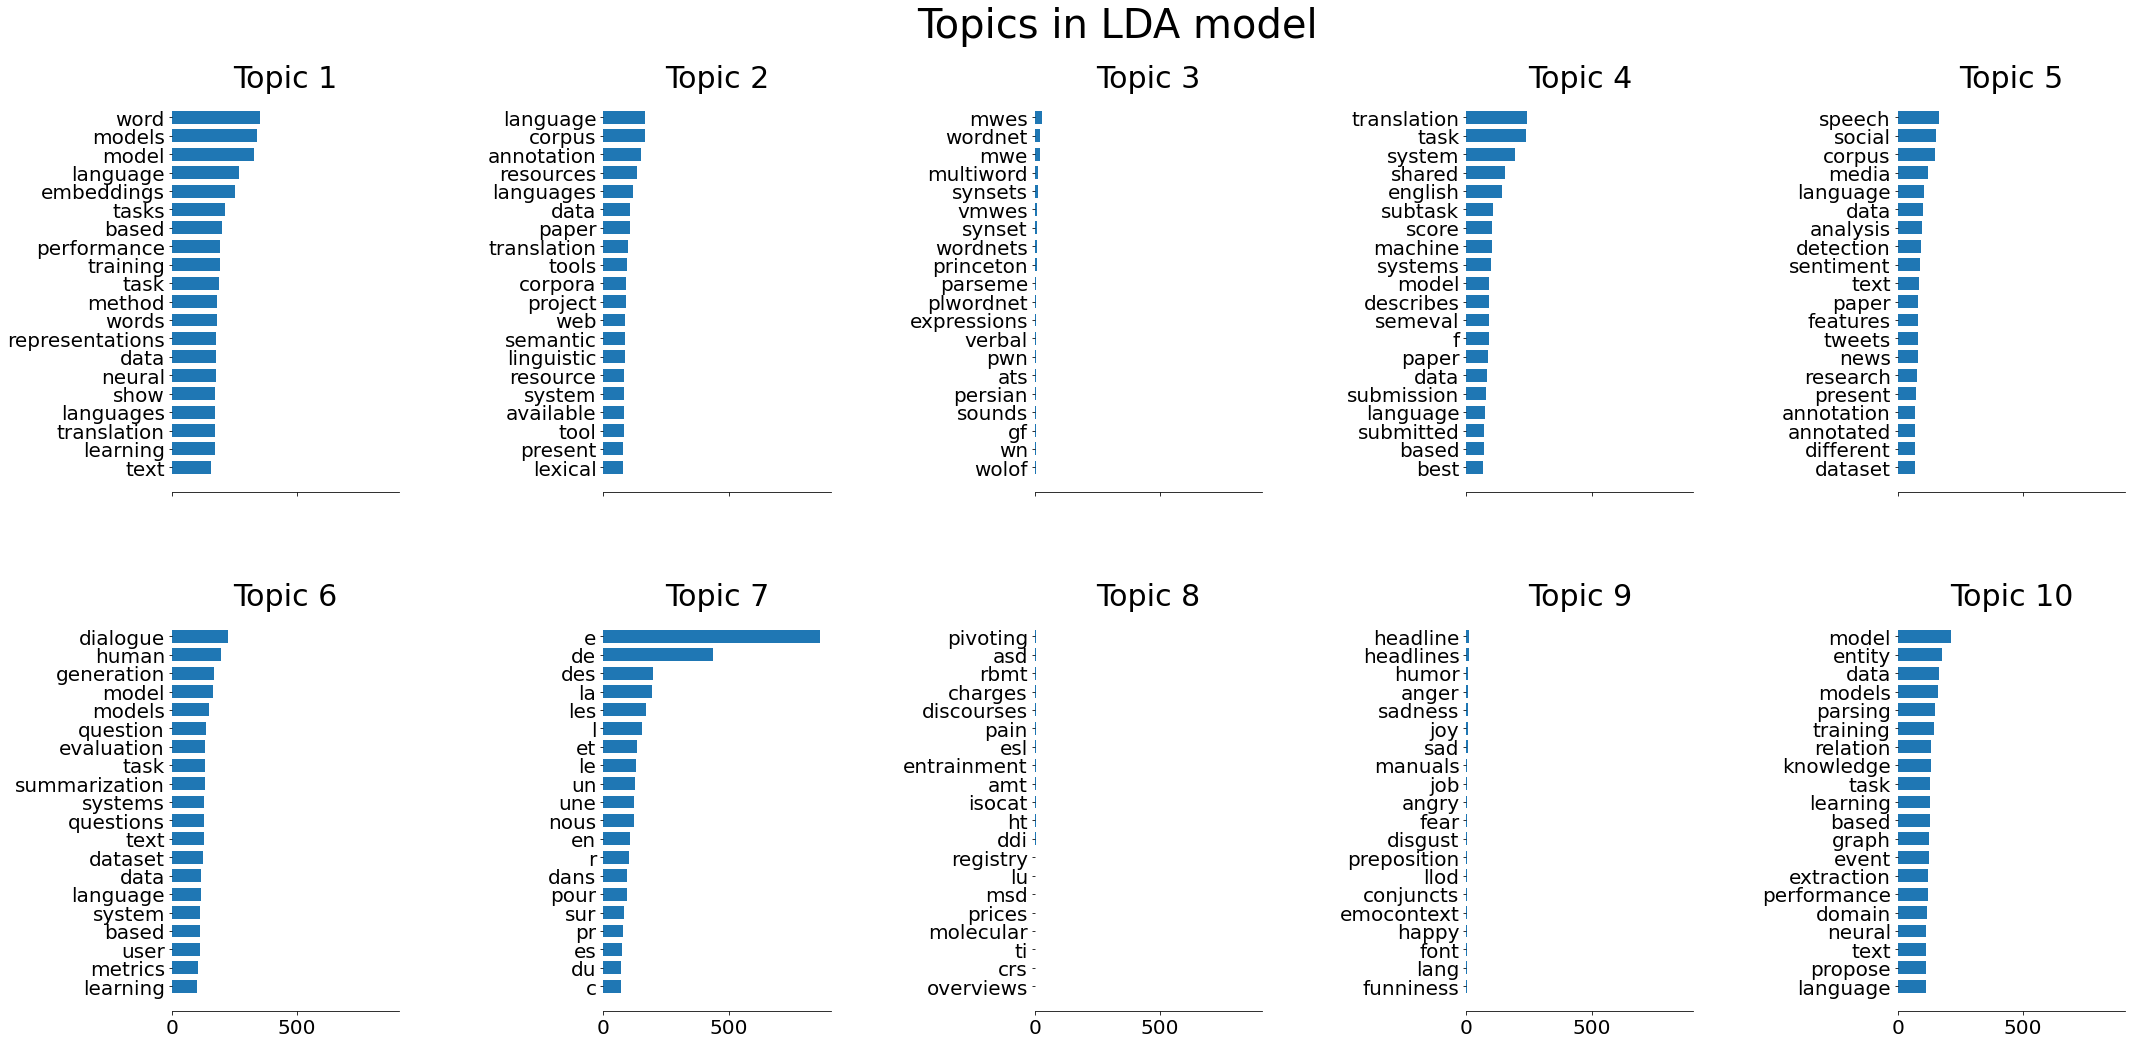

In [ ]:
#### CODIGO Q ENCONTRE PARA GRAFICAR LOS TOPICS:
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(35, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

#tf_vectorizer = CountVectorizer(
#    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
#)
tf_vectorizer = count_vect

#lda = LatentDirichletAllocation(
#    n_components=n_components,
#    max_iter=5,
#    learning_method="online",
#    learning_offset=50.0,
#    random_state=0,
#)

tf_feature_names = tf_vectorizer.get_feature_names_out()

plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")


In [ ]:
#### VOY A INTENTAR HACER LOS LDA POR AÑO, PARA VER EVOLUCION DE TOPICS.
#### PARA ELLO, PRIMERO CREARE DATASETS POR YEAR.
#### HABRIA Q HACER UNA LISTA DE data.ABSTRACT POR YEAR, PARA LUEGO PODER RECORRERLA CON UN for.
data.ABSTRACT.YEAR = []

for i in data.YEAR:
    data.ABSTRACT.YEAR[i] = data.ABSTRACT([data.YEAR[i]])
    
# Armo una lista sin repeticiones
#stoplist_tokenized = list(set(stoplist_tokenized))

#stoplist_tokenized[:10]

TypeError: ignored

In [1]:
######### GENSIM:
%%capture
!pip install pyLDAvis==2.1.2

from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

In [27]:
#texts = data.ABSTRACT  ### XXXX doc2bow expects an array of unicode tokens on input, not a single string XXXX
texts = data_clean  ### TypeError: decoding to str: need a bytes-like object, csr_matrix found
dictionary = corpora.Dictionary(texts)
print(len(dictionary))
dictionary.filter_extremes(no_below=10, no_above=0.5)
print(len(dictionary))
# CON data.ABSTRACT: ### doc2bow expects an array of unicode tokens on input, not a single string XXXX
# CON data_clean: ### TypeError: decoding to str: need a bytes-like object, csr_matrix found
##### ****** PREGUNTAR PROFES!!!! *****

TypeError: ignored